## Ridge Regresyon

# Model

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt

In [52]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25,
                                                   random_state=42)

In [53]:
# Ridge modelinin kurulumu ve fit edilmesi
ridge_model = Ridge(alpha=0.5).fit(X_train, y_train)

In [54]:
# Model katsayıları
ridge_model.coef_

array([-1.68880089e+00,  6.82185012e+00,  5.10056203e+00, -1.87036319e+00,
       -1.33173584e+00,  5.06779123e+00,  1.08894355e+00, -2.19429082e-01,
        8.22458198e-02, -8.25496085e-01,  1.58796123e+00,  1.14942737e+00,
       -7.26410681e-01,  2.75037716e-01,  3.96767257e-01, -2.88494626e+00,
        6.70694159e+01, -1.18890166e+02, -1.08154879e+01])

In [55]:
y_pred = ridge_model.predict(X_train)

In [56]:
np.sqrt(mean_squared_error(y_train, y_pred))

308.09850296526776

In [58]:
r2_score(y_train, y_pred)

0.5497008950765898

In [59]:
# Çeşitli lambda değerleri:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

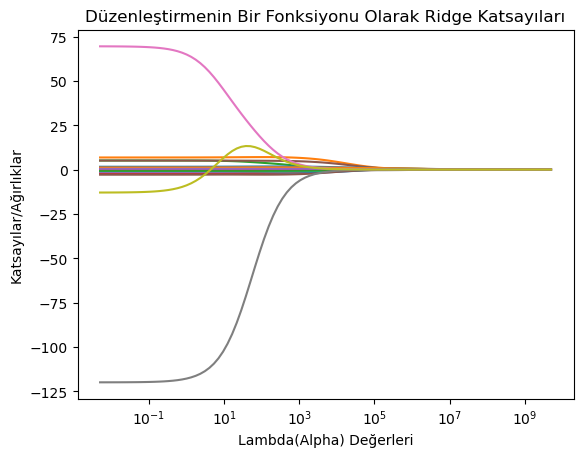

In [61]:
# Modelin optimum değerini bulup görselleştirme:
lambdas = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
# katsayılar
coef = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coef.append(ridge_model.coef_)


ax = plt.gca()
ax.plot(lambdas, coef)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenleştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")
plt.show()

## Tahmin

In [64]:
# tahmin edilen test değerlerinin atanması
y_pred = ridge_model.predict(X_test)

In [65]:
# Test hatasının görüntülenmesi
np.sqrt(mean_squared_error(y_test, y_pred))

263.47697529941297

## Model Tuning

In [68]:
lambdas = 10**np.linspace(10,-2,100)*0.5
lambdas[:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [114]:
# CV oluşturma
ridge_cv = RidgeCV(alphas = lambdas,
                  scoring = "neg_mean_squared_error",
                  normalize = True)

In [116]:
# Modeli fit etme
ridge_cv.fit(X_train, y_train)

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [117]:
ridge_cv.alpha_

0.4348745013088917

In [119]:
ridge_turned = Ridge(alpha = ridge_cv.alpha_, 
                    normalize = True).fit(X_train, y_train)

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [121]:
# Hata değerimizi yazdıralım model tuningden sonra
np.sqrt(mean_squared_error(y_test, ridge_turned.predict(X_test)))

305.21885965909485